<a href="https://colab.research.google.com/github/vdoddihithlu/MLModels/blob/main/Image_Recognition_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")   # nano model (fast & small)


image 1/1 /content/tree3.jpg: 384x640 (no detections), 215.8ms
Speed: 17.1ms preprocess, 215.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


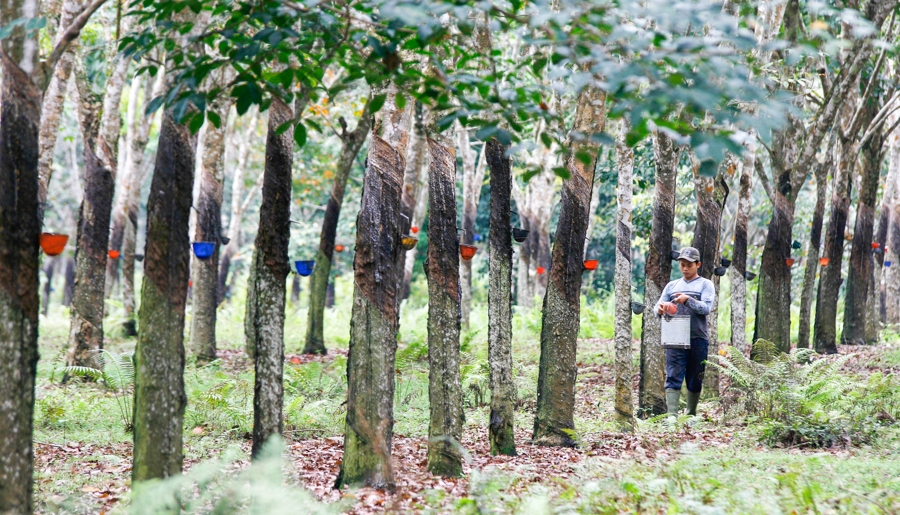

In [66]:
# Run detection on an image
results = model("tree3.jpg")
#results = model("https://ultralytics.com/images/bus.jpg")

# Show results
results[0].show()

# Save results
#results[0].save()

In [ ]:
https://app.roboflow.com/


dataset/
│
├─ train/
│   ├─ images/
│   ├─ labels/
│
└─ valid/
│   ├─ images/
│   ├─ labels/
data.yaml

/content/sample_data/v5/train/images/156461420-agricultural-rubber-tree-hevea-brasiliensis-with-beautiful-sunbeam-in-morning-in-southern-of_jpg.rf.c3e703040641107ae1bc214ef8365e63.jpg
/content/sample_data/v5/train/labels/156461420-agricultural-rubber-tree-hevea-brasiliensis-with-beautiful-sunbeam-in-morning-in-southern-of_jpg.rf.c3e703040641107ae1bc214ef8365e63.txt


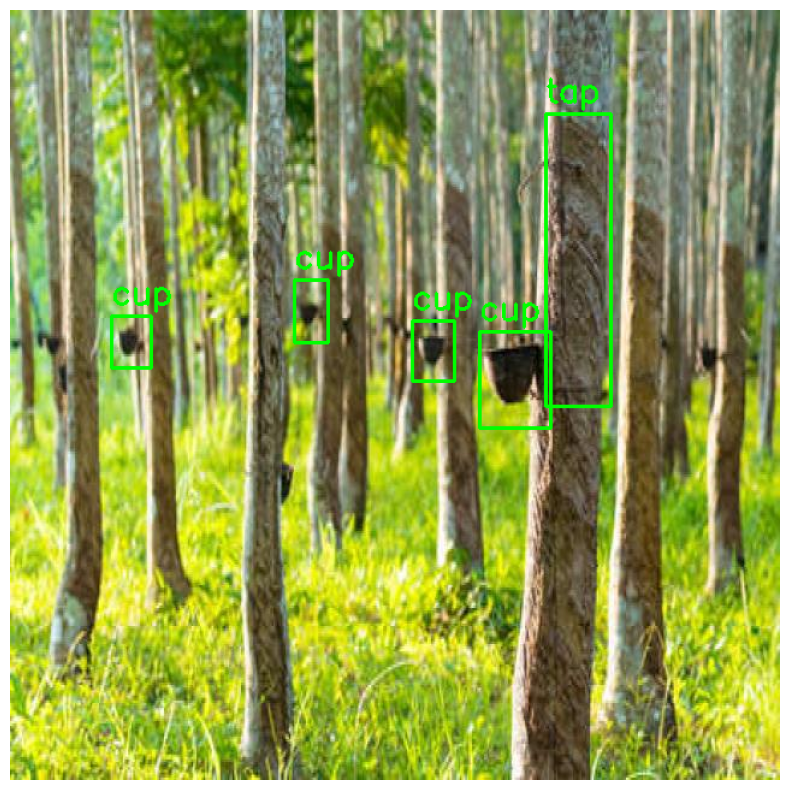

In [37]:
import cv2
import os
import matplotlib.pyplot as plt

def draw_yolo_boxes(image_path, label_path, class_names):
    img = cv2.imread(image_path)
    h, w, _ = img.shape

    # Read YOLO label file
    with open(label_path, "r") as f:
        for line in f.readlines():
            cls, x_center, y_center, width, height = map(float, line.strip().split())

            # Convert from YOLO format to pixel coordinates
            x1 = int((x_center - width/2) * w)
            y1 = int((y_center - height/2) * h)
            x2 = int((x_center + width/2) * w)
            y2 = int((y_center + height/2) * h)

            # Draw rectangle
            cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
            # Label
            cv2.putText(img, class_names[int(cls)], (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    # Show image
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Folder with images and labels
images_folder = "/content/sample_data/v5/train/images"
labels_folder = "/content/sample_data/v5/train/labels"

# Class names
class_names = ["cup","tap"]

# Example: visualize first image
img_file = os.listdir(images_folder)[1]
img_path = os.path.join(images_folder, img_file)
label_path = os.path.join(labels_folder, img_file.replace(".jpg",".txt"))

print(img_path)
print(label_path)

draw_yolo_boxes(img_path, label_path, class_names)


In [38]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # pretrained model

# Train
model.train(
    data="/content/sample_data/v5/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/sample_data/v5/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c5b7690db80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [39]:
# Load best model
tree_model = YOLO("/content/runs/detect/train5/weights/best.pt")



image 1/1 /content/sample_data/v5/train/images/rubber-tree-plantation-R59J7K_jpg.rf.f9c4f0fbf553beef95727049d5d7a218.jpg: 640x640 1 cup, 1 tap, 232.4ms
Speed: 4.6ms preprocess, 232.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


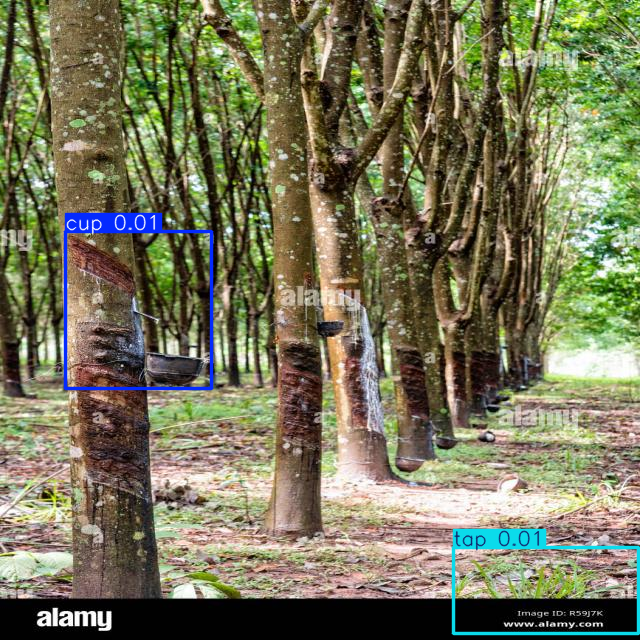

In [60]:
# Detect on new image
results = tree_model.predict("/content/sample_data/v5/train/images/rubber-tree-plantation-R59J7K_jpg.rf.f9c4f0fbf553beef95727049d5d7a218.jpg", conf=0.0064)
results[0].show()


image 1/1 /content/sample_data/v5/train/images/images-5-_jpg.rf.830dc60903d95def69c207fe28416251.jpg: 640x640 6 cups, 3 taps, 246.0ms
Speed: 3.7ms preprocess, 246.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


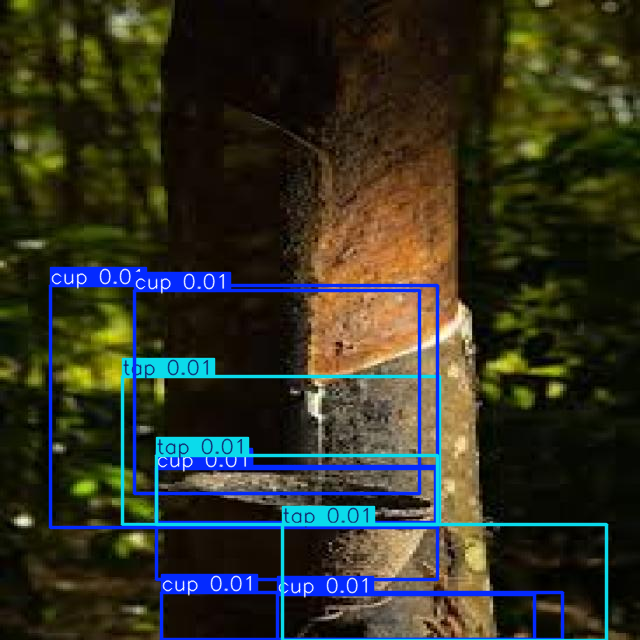

In [65]:
# Detect on new image
file = "/content/sample_data/v5/train/images/images-5-_jpg.rf.830dc60903d95def69c207fe28416251.jpg"
results = tree_model.predict(file, conf=0.0064)
results[0].show()